In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, LSTM, Input
from tensorflow.keras.layers import Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import Conv2D, Reshape, ZeroPadding2D

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# De-Pickling Data with encoding latin1
with open("/content/drive/MyDrive/RML2016.10a_dict.pkl", 'rb') as f:
    Xd = pickle.load(f, encoding='latin1')

classes = [
    '32PSK', '16APSK', '32QAM', 'FM', 'GMSK', '32APSK', 'OQPSK',
    '8ASK', 'BPSK', '8PSK', 'AM-SSB-SC', '4ASK', '16PSK', '64APSK',
    '128QAM', '128APSK','AM-DSB-SC', 'AM-SSB-WC', '64QAM', 'QPSK',
    '256QAM','AM-DSB-WC','OOK','16QAM'
]


Mounted at /content/drive


In [ ]:
print("Keys in the dataset (modulation, SNR):\n", list(Xd.keys())[:10])  # Print the first 10 keys

Keys in the dataset (modulation, SNR):
 [('QPSK', 2), ('PAM4', 8), ('AM-DSB', -4), ('GFSK', 6), ('QAM64', 8), ('AM-SSB', 12), ('8PSK', 8), ('8PSK', 12), ('QAM64', -6), ('QAM16', 2)]


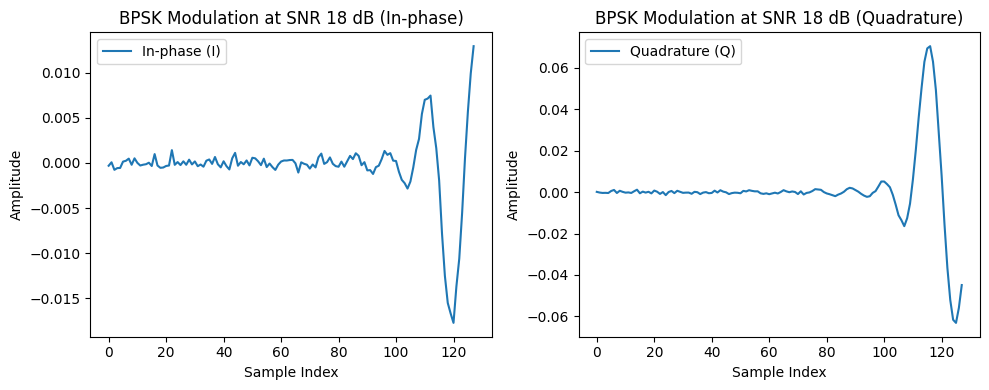

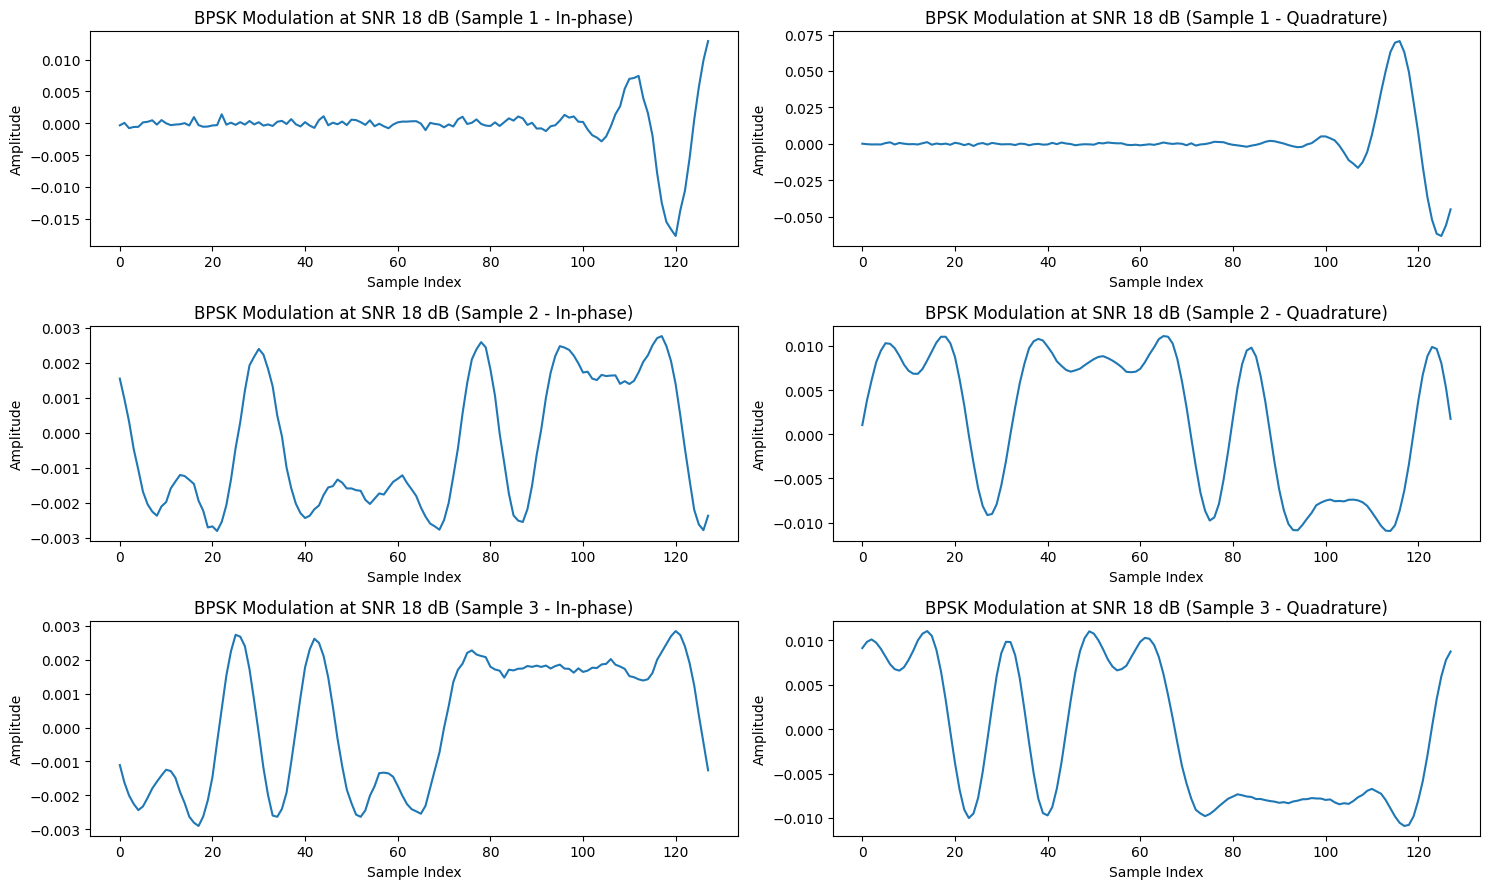

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(signal_example[0], label='In-phase (I)')
plt.title(f"{modulation_example} Modulation at SNR {snr_example} dB (In-phase)")
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(signal_example[1], label='Quadrature (Q)')
plt.title(f"{modulation_example} Modulation at SNR {snr_example} dB (Quadrature)")
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize multiple samples
def plot_signals(mod, snr, num_samples=3):
    plt.figure(figsize=(15, num_samples * 3))
    for i in range(num_samples):
        signal = Xd[(mod, snr)][i]
        plt.subplot(num_samples, 2, i * 2 + 1)
        plt.plot(signal[0])
        plt.title(f"{mod} Modulation at SNR {snr} dB (Sample {i+1} - In-phase)")
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')

        plt.subplot(num_samples, 2, i * 2 + 2)
        plt.plot(signal[1])
        plt.title(f"{mod} Modulation at SNR {snr} dB (Sample {i+1} - Quadrature)")
        plt.xlabel('Sample Index')
        plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Plotting multiple signals for a specific modulation and SNR
plot_signals('BPSK', 18, num_samples=3)

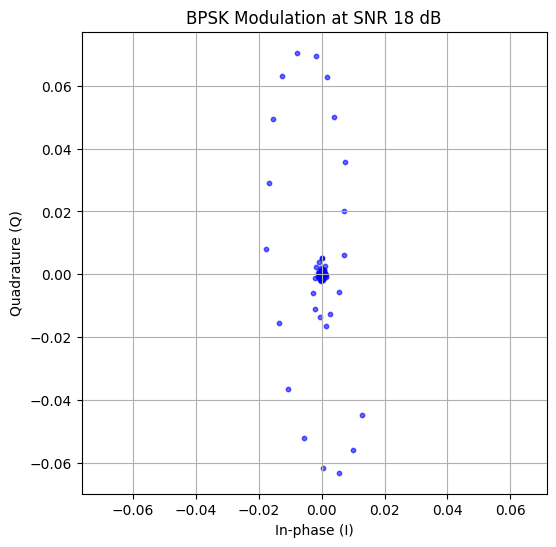

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Xd' is already loaded and contains the IQ data

# Function to plot IQ (constellation) diagram
def plot_iq(samples, title='IQ Plot'):
    plt.figure(figsize=(6, 6))
    plt.scatter(samples[0], samples[1], color='blue', s=10, alpha=0.6)
    plt.title(title)
    plt.xlabel('In-phase (I)')
    plt.ylabel('Quadrature (Q)')
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example usage: Plot IQ samples for 'BPSK' modulation at 18 dB SNR
modulation_example = 'BPSK'
snr_example = 18

# Get the first signal sample for the given modulation and SNR
iq_sample = Xd[(modulation_example, snr_example)][0]

# Plot the IQ constellation diagram for the selected sample
plot_iq(iq_sample, title=f"{modulation_example} Modulation at SNR {snr_example} dB")
